In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.clasterization import clasterize
from src.fetch_from_youtube import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [3]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [4]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens', 'cohere']

In [5]:
embeddings = embed(model_name=embed_model_names[1], sentences=comments)

embeddings.shape

(3100, 1024)

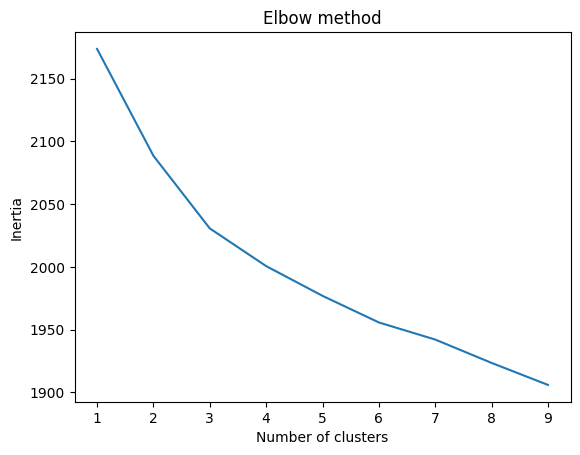

In [22]:
interias = []

for n_clusters in range(1, 10):
    _, kmeans = clasterize('kmeans', embeddings, n_clusters=n_clusters)
    interias.append(kmeans.inertia_)

# Plot the elbow

import matplotlib.pyplot as plt

plt.plot(range(1, 10), interias)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
choosed_n_clusters = 3

In [24]:
from collections import Counter

clasters, kmeans = clasterize(
    method_name='kmeans', 
    embeddings=embeddings,
    n_clusters=choosed_n_clusters)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')


kmeans.inertia_

Claster 1 has 747 comments
Claster 0 has 1209 comments
Claster 2 has 1144 comments


2030.3357115911215

In [25]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Oh dear lord - someone please call a regulator!! Sam Altman's vision of saving humanity will be the frigging END. He has no idea what he's actually unleashing. And yet his weirdly overcalm, HAL-like d
----------
Can’t trust him between 1:32-1:34.
----------
i dont like to judge people but this guy seems sus as fuck, get bad vibes, lies
----------
1:33:50 - Sam's statement which basically summarizes a lot of people's concerns about him and their creation.
----------
The moron that poses as a smart guy! :)
----------
Claster 1
Great interview
----------
Thanks for a great discussion. Very heartened to discover that Sam is a responsible, reasonable person with insight and humility.
----------
I completely agree with Sam, in that people using ChatGPT to complain about it saying more nice things about one person than another is crazy. This incredible tool, and that's what it's being used for
----------
I've enjoyed and learned from every Lex-cast I've watched, but this was outstan

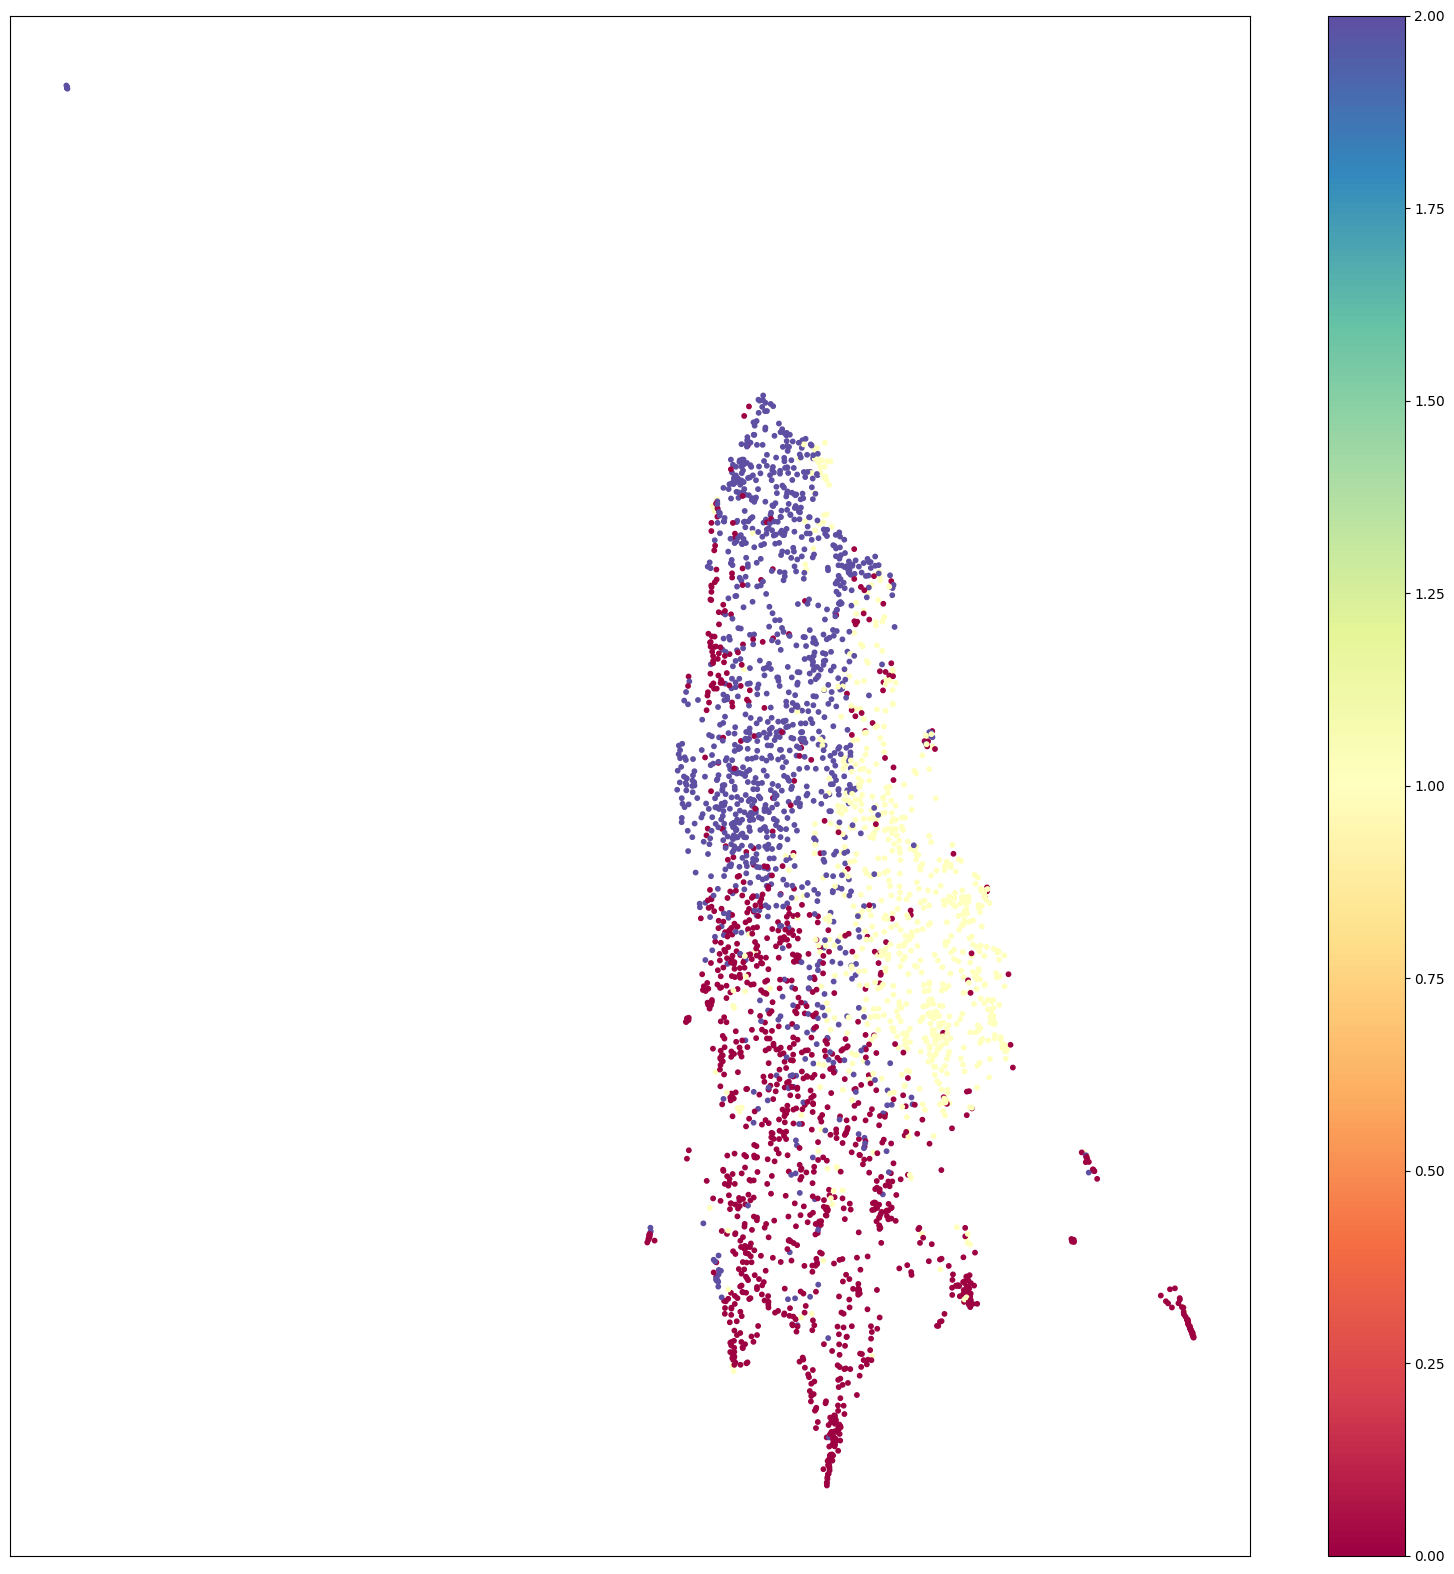

In [30]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2).fit_transform(embeddings[:])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters[:], s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()